In [4]:
#Importing all the packages 
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
import requests
import json
from bs4 import BeautifulSoup
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import pandas as pd
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

## TASK - 1 
<b> <i> Using requests and BeautifulSoup to scrape a static html webpage (if using Python): <i> 

In [9]:
url = 'http://yuhenghu.com/ids566.html'
    
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

for w,c in zip(soup.select('td.week'),soup.select('td.content')):
    print(w.text,c.text)

Week 1 Introduction and how to get and represent text
Week 2 Classification models
Week 3 Clustering and topical models
Week 4 Word embeddings and language models
Week 5 Sentiment analysis I
Week 6 Sentiment analysis II
Week 7 Text analytics for busisness: case studies
Week 8 Final presentation


## TASK - 2
Using requests and BeautifulSoup and XHR inspection to scrape a dynamic html webpage (if using Python):
  * Write a scraper to retrieve data about month/year and price of this home. Sort by the month/year
  * In addition, also plot the price vs. month/year.

        Date    Price
0    01/2012   662835
1    02/2012   676508
2    03/2012   683436
3    04/2012   701710
4    05/2012   757372
..       ...      ...
116  09/2021  1679200
117  10/2021  1692700
118  11/2021  1714100
119  12/2021  1742400
120  01/2022  2037500

[121 rows x 2 columns]


None


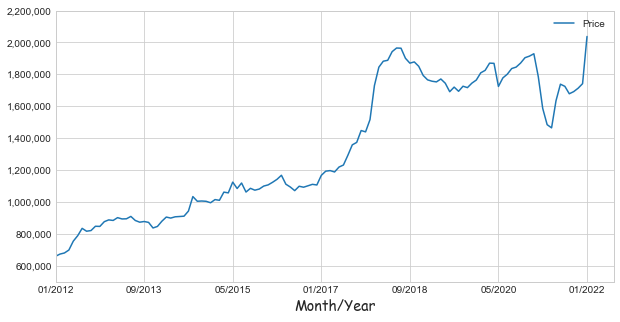

In [8]:
url = 'https://www.zillow.com/graphql/'

headers = {'authority': 'www.zillow.com', 'method':'POST', 'path': '/graphql/?zpid=19620225&operationName=WalkAndTransitScoreQuery', 'scheme': 'https', 'accept-encoding': 'gzip, deflate, br', 'content-length': '389', 'content-type': 'text/plain', 'accept-language': 'en-US,en;q=0.9', 'cookie': 'zguid=23|%244b1e8217-696a-4ac5-b616-fc06bc533ce7; zgsession=1|d4ef509c-37b8-4d44-91ec-18dd70bb6fc3; JSESSIONID=4AED0C9FF8457DA38546CF370FDCED12; _pxvid=fbf95074-766f-11ec-ae14-6b6a66714f63; _pxff_bsco=1; g_state={"i_p":1642305462036,"i_l":1}; _px3=0b5ae20c8495ec6fac17d1bfe0298416db683e9a7e147ebd90bbe0d277b6ce50:j5lDXccXxFGFHM9SBKLQo6wBCEAkhWlj2IzQjtSpq57CGa6YdGYRd4FED/XIemKSqLcadX+J/qHhXVmyWlivWQ==:1000:11j59kMkkLARQbXe4unew+BA3AIfmtFoUIMXBPSadnYBBdIw6lgkQY/WGv1GQwbk800Ptfd/AYMqOCBthkgXqcXbhHmco0ty46zNV7URfGRVYGMFx8lgRzuvvPucyX7sqmW6geRQln+RpxbQJzXYq6oE+Wx6TCWDtwuOY5cJUAcMn5TgZxQNgA4+0uFD3Fbll5fGWGyiInlN59lEBkzHgg==; search=6|1644890475250%7Crect%3D37.36927041894877%252C-121.89459800720215%252C37.28327268915797%252C-122.16444969177246%26zpid%3D19620225%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26sort%3Ddays%26z%3D1%26fs%3D1%26fr%3D0%26mmm%3D0%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%09%09%09%09%09%09%09%09; AWSALB=DpzOEl8bgZFq3hikl+BG8QjUmH0uGb1zDC5uhkxptLdkNdt+nKfcXLsXbnvluDH1FqqL/rEZakoTtsAN2hhb1ntnnlvP28kv3mzI7WIWuuDNH6A1aZSYifvD7jsS; AWSALBCORS=DpzOEl8bgZFq3hikl+BG8QjUmH0uGb1zDC5uhkxptLdkNdt+nKfcXLsXbnvluDH1FqqL/rEZakoTtsAN2hhb1ntnnlvP28kv3mzI7WIWuuDNH6A1aZSYifvD7jsS','origin': 'https://www.zillow.com','user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'}

def json_HomeValueChartData(zpid):
    #this is payload, i.e., the query sent to zillow server

    chartData = {"operationName":"HomeValueChartDataQuery","variables":{"zpid":00000},"query":"query HomeValueChartDataQuery($zpid: ID!, $metricType: HomeValueChartMetricType, $timePeriod: HomeValueChartTimePeriod, $useNewChartAPI: Boolean) {\n  property(zpid: $zpid) {\n    homeValueChartData(metricType: $metricType, timePeriod: $timePeriod, useNewChartAPI: $useNewChartAPI) {\n      points {\n        x\n        y\n      }\n      name\n    }\n  }\n}\n","clientVersion":"home-details/6.0.11.6969.master.4463e00"}
    chartData['variables']['zpid']=zpid
    return chartData

def get_json_ChartData(zpid):
    chartData = json_HomeValueChartData(zpid)
    
    try:
        chart_req = requests.post(url=url, json=chartData, headers=headers) #send request to zillow server
        chart_out = json.loads(chart_req.text) #get the response from zillow server and load as json object
        chart_data = chart_out['data']['property']['homeValueChartData'] #Extracting x and y coordinates
        xy = chart_data[0]['points'] 
        date_1 =[(xy[i]['x']) for i in range(len(xy))]
        date = [(time.strftime('%m/%Y', time.gmtime(t/1000.0))) for t in date_1]  
        price =[(xy[i]['y']) for i in range(len(xy))]
        dp = list(zip(date,price))
        df = pd.DataFrame (dp, columns = ['Date','Price'])
        print(df)
        
        #Plotting graphs
        plt.rcParams['figure.figsize'] = [10, 5]
        plt.style.use('seaborn-whitegrid')
        fig = go.Figure([go.Scatter(x=df['Date'], y=df['Price'])])
        fig.show()

        ax = df.plot('Date' , 'Price',xlim=0)
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.set_xlabel('Month/Year',size = 'x-large',family = 'fantasy')
        ax.set_ylim([500000,2200000])
        
    except Exception as e:
        print ('Error, try again', e)


    
print(get_json_ChartData(19620225)) 
